### 군집(clustering)
* 레이블이 없는 데이터에 레이블을 부여하고자 할때 사용
* 비지도 학습으로 유사한 정도에 따라 다수의 객체를 그룹으로 만들때 사용
* 군집을 통해 레이블을 선정하여 지도학습으로 변경
* 군집의 개수 지정하는 방법
    - 감으로(해당 그룹의 개수를 미리 알고 있는 경우)
    - 평가지표로 확인(실루엣 지표 적용( -1 ~ 1사이, 1에 가까울수록 좋다)
    - 그래프 그려서 눈으로 확인

#### k-means
* k-means은 군집화(clustering)에서 가장 일반적으로 사용되는 알고리즘
* 거리기반 군집화다. 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

#### k-means 파라미터
* n_clusters : 가장 중요한 파라미터로 군집화할 개수를 정의한다.
* init : 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 일반적으로 k-means++방식으로 최초 설정한다
* max_iter : 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.

#### 군집화가 완료되면 관련 주요 속성이 있다
* labels_ : 정답을 가지고 있는 변수(군집의 번호)
* cluster_centers_ : 각 군집 중심점 좌표(shape는[군집 개수, 피처 개수]), 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 할 수 있다.

### 고객분류
* 고객들의 정보들을 가지고 있는 데이터 셋이다. 해당 데이터 셋을 이용하여 사용금액에 따른 고객을 분류하고자 한다.
* 분류 대상 : 연간 소득 대비 지출 점수를 통한 분류
* 컬럼
    - CustomerID : 고객 아이디
    - Gender : 성별
    - Age : 나이
    - Annual Income (k$) : 연간소득
    - Spending Score (1-100) : 지출 점수

* 참고 - 필요한 컬럼은 연간 소득과 지출 점수만 있으면 된다.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# !pip install yellowbrick

In [4]:
#KEIbowVisualize : 클러스터 개수를그래프로 표현

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
features = ['Annual Income (k$)',
       'Spending Score (1-100)']

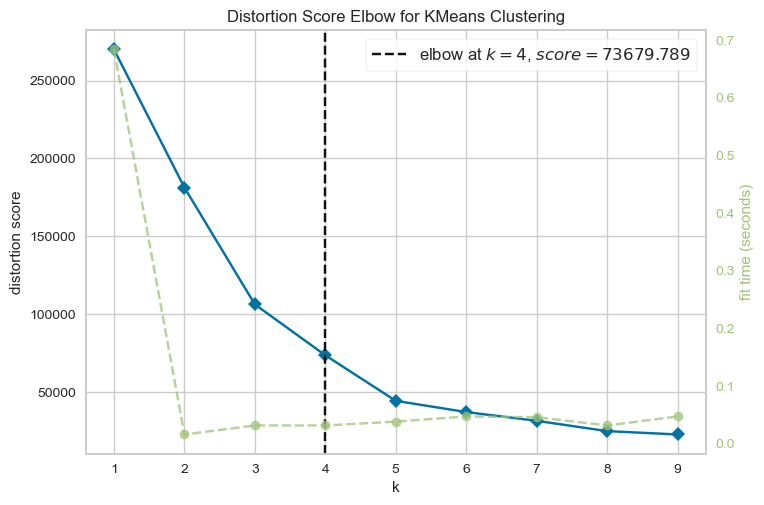

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
vis = KElbowVisualizer(model, k=(1,10))
vis.fit(df[features])
vis.show()

#### 군집 평가
* 실루엣 분석
    - 각 군집간의 거리가 얼마나 효율적으로 분리 됐는지를 나타낸다
    - 효율적으로 분리 됐다는 것은 다른 군집과의 거리가 떨어져 있고 동일 군집끼리의 데이터가 잘 뭉쳐 있다는 의미이다

In [8]:
from sklearn.metrics import silhouette_score
all_score=[]
i = 1

while i<10:
    i += 1
    km = KMeans( n_clusters=i )
    km.fit(df[features])
    sil_score = silhouette_score(df[features], km.labels_)
    
    score_dict = {'cluster_num':i, 'sil_score':sil_score}
    all_score.append(score_dict)
score_df = pd.DataFrame(all_score)
score_df

,cluster_num,sil_score
0,2,0.296897
1,3,0.467614
2,4,0.493196
3,5,0.553932
4,6,0.537968
5,7,0.527029
6,8,0.453649
7,9,0.456303
8,10,0.458422


In [9]:
km = KMeans(n_clusters=5, init='k-means++', max_iter=300,
                           random_state=0)
km.fit(df[features])

KMeans(n_clusters=5, random_state=0)

In [10]:
df['cluster'] = km.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

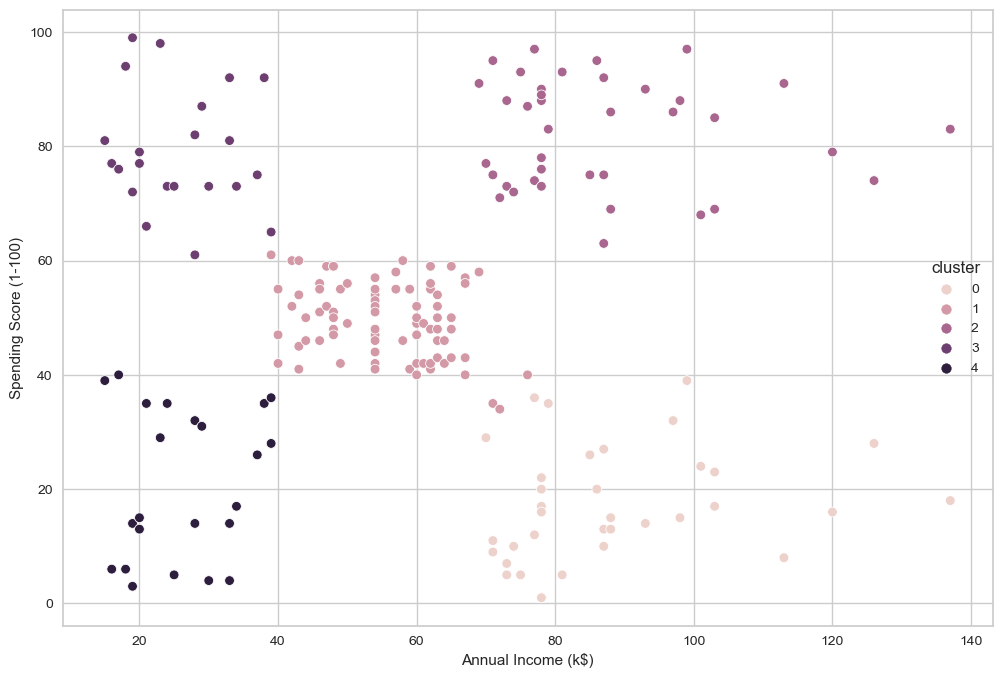

In [11]:
features =['Annual Income (k$)',
       'Spending Score (1-100)','cluster']

plt.figure(figsize = (12,8))
sns.scatterplot(data=df[features],
               x="Annual Income (k$)",
               y="Spending Score (1-100)",
               hue = 'cluster')

In [12]:
center = km.cluster_centers_
center
#center[:,0] #x축
#center[:,1] #y축

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

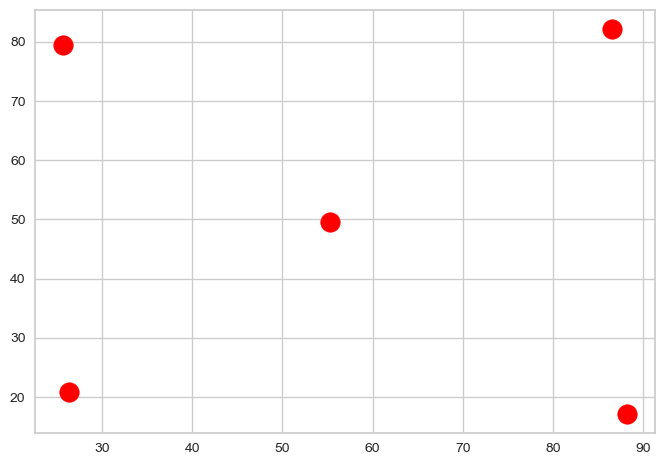

In [13]:
plt.scatter(x=center[:,0], y=center[:,1], c='red',s=200)

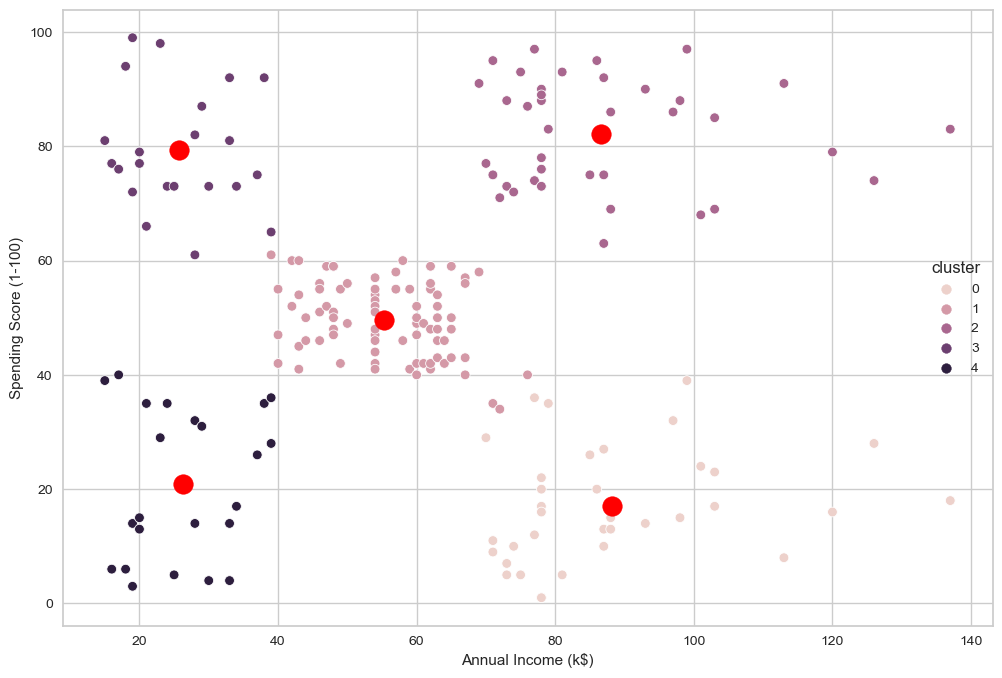

In [14]:
plt.figure( figsize = (12,8))
sns.scatterplot(data=df[features], 
               x='Annual Income (k$)',
               y='Spending Score (1-100)',
               hue = 'cluster')
plt.scatter(x=center[:,0], y=center[:,1], c='red',s=200)

### 분류모델

In [15]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster'],
      dtype='object')

In [20]:
features = ['Annual Income (k$)',
       'Spending Score (1-100)']
label = 'cluster'

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
        train_test_split(df[features], df[label],
                        test_size=0.2,
                        random_state=11)


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': range(5,100,10),
    'max_depth' : range(4,11,2)
}
rfc = RandomForestClassifier()

grid_cv = GridSearchCV(rfc, param_grid=params,
                      cv=3, n_jobs= -1)
grid_cv.fit( X_train, y_train )

print('최적의 하이퍼파라미터 : ', grid_cv.best_params_)
print('train : ', grid_cv.score(X_train, y_train))
print('test : ', grid_cv.score(X_test, y_test))

최적의 하이퍼파라미터 :  {'max_depth': 4, 'n_estimators': 75}
train :  0.99375
test :  0.975


In [26]:
grid_cv.predict([[20,20]])

array([4])